In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### 1 Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [2]:
from shapely.geometry import Point, LineString, Polygon

#### 1.1 точка

In [3]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

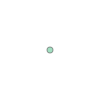

In [4]:
point

In [5]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


In [6]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

Это границы точки

#### 1.2 Линия

In [7]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

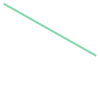

In [8]:
line

bounds - (minx, miny, maxx, maxy) 

In [9]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [10]:
list(line.coords)

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### 1.3 Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города

In [11]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


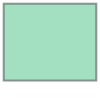

In [12]:
polygon

Границы полигона

In [13]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Для полигона, у которого внутри дырка, можно найти внутренние и внешние границы

In [14]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [16]:
# дырок нет - лист пустой :)
list(polygon.interiors)

[]

### 2 Операции с геометрией

<!-- <img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png> -->
<img src=images/overlay_operations.png>

intersection

In [17]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

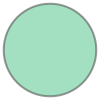

In [18]:
b

**intersection**

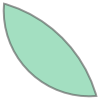

In [19]:
a.intersection(b)

**union**

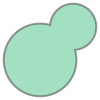

In [21]:
a.union(b)

**difference**

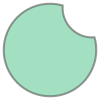

In [22]:
a.difference(b)

**contains**

проверяем лежит ли точка в указанном полигоне

In [23]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [24]:
polygon.contains(Point(piter_lon, piter_lat))

False

### 3 Geopandas

In [25]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

координаты series нужно привязать к какой-то местности:

In [26]:
geo_series.crs = {'init': 'epsg:4326'}

C:\Users\kikoooiemama\anaconda3\envs\megafon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


#### 3.1 GeoDataFrame

Теперь посмотрим как создать Geo Dataframe

In [27]:
moscow_districts = gpd.read_file('data/moscow_districts.geojson')

In [28]:
moscow_districts

,ABBREV_AO,MEN18_27,MEN18_60,MENOLDER60,NAME,RETIREMENT,TOTALMEN,TOTALPOPUL,TOTALWOMEN,UNDER18,WOMEN18_55,WOMENOLDER,WORKING_AG,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.17853 56.00795, 37.18083 56.00825..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"MULTIPOLYGON (((37.18317 55.60565, 37.18455 55..."
3,ЗелАО,1628.0,8830.0,3540.0,Савёлки,12807.0,15214.0,35510.0,20296.0,5494.0,8379.0,9267.0,17209.0,"POLYGON ((37.20946 56.00083, 37.20975 56.00088..."
4,ЗелАО,1822.0,11186.0,4712.0,Силино,15518.0,19343.0,43495.0,24152.0,6587.0,10204.0,10806.0,21390.0,"POLYGON ((37.13160 56.01645, 37.13266 56.01678..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,ВАО,5139.0,29028.0,15376.0,Ивановское,51228.0,52645.0,122890.0,70245.0,15845.0,26789.0,35852.0,55817.0,"POLYGON ((37.79981 55.76232, 37.79981 55.76243..."
121,ВАО,3224.0,18306.0,3479.0,Косино-Ухтомский,13508.0,28488.0,63143.0,34655.0,12984.0,18345.0,10029.0,36651.0,"POLYGON ((37.83602 55.70978, 37.83620 55.71008..."
122,ВАО,5162.0,28399.0,7168.0,Новокосино,26247.0,43165.0,96015.0,52850.0,14610.0,26759.0,19079.0,55158.0,"POLYGON ((37.84042 55.73049, 37.84063 55.73196..."
123,ЮВАО,1959.0,7695.0,1466.0,Некрасовка,5857.0,11950.0,26905.0,14955.0,5318.0,7974.0,4391.0,15669.0,"POLYGON ((37.90613 55.70626, 37.90701 55.70699..."


In [29]:
moscow_districts.columns = moscow_districts.columns.str.lower()

In [30]:
moscow_districts.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,women18_55,womenolder,working_ag,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.17853 56.00795, 37.18083 56.00825..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"MULTIPOLYGON (((37.18317 55.60565, 37.18455 55..."
3,ЗелАО,1628.0,8830.0,3540.0,Савёлки,12807.0,15214.0,35510.0,20296.0,5494.0,8379.0,9267.0,17209.0,"POLYGON ((37.20946 56.00083, 37.20975 56.00088..."
4,ЗелАО,1822.0,11186.0,4712.0,Силино,15518.0,19343.0,43495.0,24152.0,6587.0,10204.0,10806.0,21390.0,"POLYGON ((37.13160 56.01645, 37.13266 56.01678..."


In [45]:
moscow_districts.shape

(125, 14)

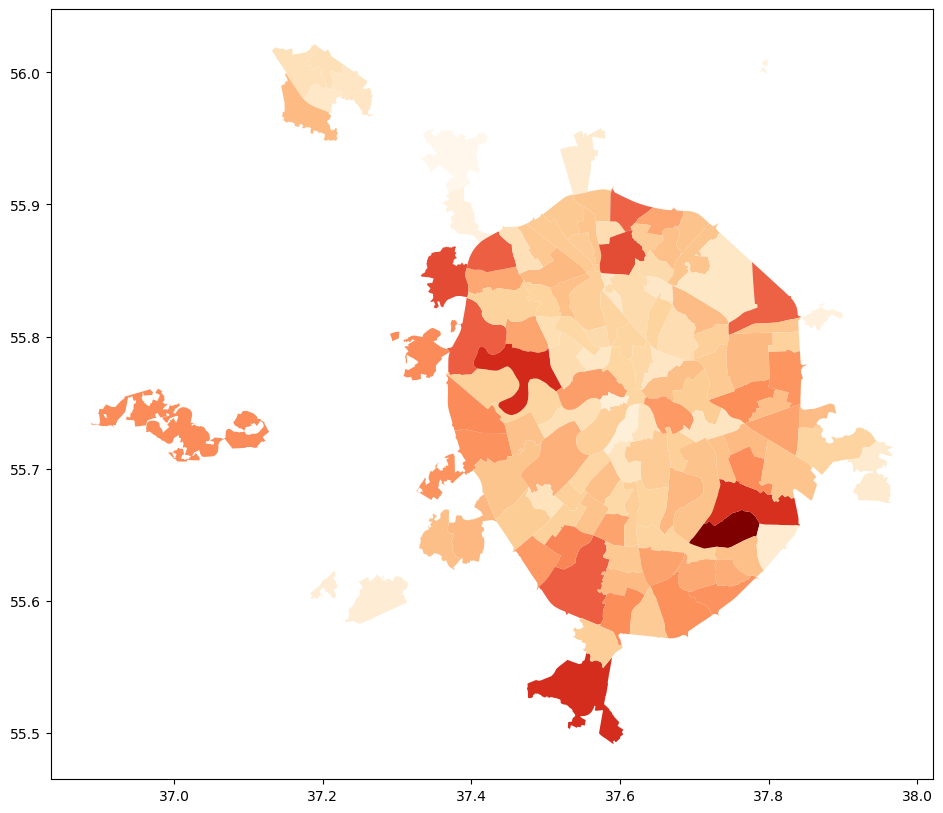

In [31]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### 3.2 OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы. В OpenStreetMap есть свое АПИ запросов и ответов. Поэтому мы сделаем запрос на выкачку данных о магазинах в Москве.

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [32]:
import requests

https://wiki.openstreetmap.org/wiki/Map_Features - информация по категориям

In [33]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335); 
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json() # данные в виде json, магазины - это точки, указываем область по которой ищем

In [34]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.59 e21c39fe',
 'osm3s': {'timestamp_osm_base': '2023-01-30T19:34:14Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 1000,
   'lat': 55.9951147,
   'lon': 37.2075319,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'}},
  {'type': 'node',
   'id': 245868628,
   'lat': 55.9131682,
   'lon': 37.3961899,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141410',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:en': 'Auchan',
    'brand:ru': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'cont

In [35]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [36]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [37]:
loaded.head()

,type,id,lat,lon,tags,shop
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket
2,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes
3,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes
4,node,254672440,55.744680,37.864214,"{'amenity': 'fuel', 'brand': 'Роснефть', 'bran...",yes


#### 3.3 Создание geodataframe

Добавим поле geometry, который будет определять каждую строку

In [38]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)
# crs - это проекция

C:\Users\kikoooiemama\anaconda3\envs\megafon\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [39]:
places_geo.head()

,type,id,lat,lon,tags,shop,geometry
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket,POINT (37.20753 55.99511)
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket,POINT (37.39619 55.91317)
2,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes,POINT (38.06889 55.65605)
3,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes,POINT (37.77043 55.63467)
4,node,254672440,55.744680,37.864214,"{'amenity': 'fuel', 'brand': 'Роснефть', 'bran...",yes,POINT (37.86421 55.74468)


### 4 Spatial join

Свяжем места (магазы, супермаркеты) с районами москвы

проверка проекций - у двух датафреймов они должны совпадать

In [40]:
moscow_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
places_geo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
# join как в SQL. Районы: moscow_disctricts, Места
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')

C:\Users\kikoooiemama\anaconda3\envs\megafon\Lib\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Temp\ipykernel_11704\3760668013.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')


Получилась объедененная таблица районов и магазинов

In [43]:
places_district.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,...,womenolder,working_ag,geometry,index_right,type,id,lat,lon,tags,shop
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",54825,node,10134968142,55.735930,37.496992,"{'contact:phone': '+7 800 2347000', 'contact:w...",outpost
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",8467,node,2616921859,55.734025,37.489838,"{'addr:housenumber': '26', 'addr:street': 'ули...",convenience
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",6582,node,2162410698,55.734027,37.490910,"{'name': 'Интим', 'shop': 'erotic'}",erotic
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",1458,node,920594739,55.736636,37.490068,{'shop': 'butcher'},butcher
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",3946,node,1433080667,55.736650,37.491228,"{'name': 'Продукты', 'opening_hours': '09:00-2...",convenience


In [44]:
places_district.shape

(37003, 21)

Было просто 125 райнов, а стало 37003 магазинов, у которых указан район

In [46]:
# сгруппируем места по районам
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

Теперь можно нарисовать карту, где можно будет посмотреть население и количество магазинов

In [48]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

‘BoxPlot’, ‘EqualInterval’, ‘FisherJenks’, ‘FisherJenksSampled’, ‘HeadTailBreaks’, ‘JenksCaspall’, ‘JenksCaspallForced’, ‘JenksCaspallSampled’, ‘MaxP’, ‘MaximumBreaks’, ‘NaturalBreaks’, ‘Quantiles’, ‘Percentiles’, ‘StdMean’, ‘UserDefined’

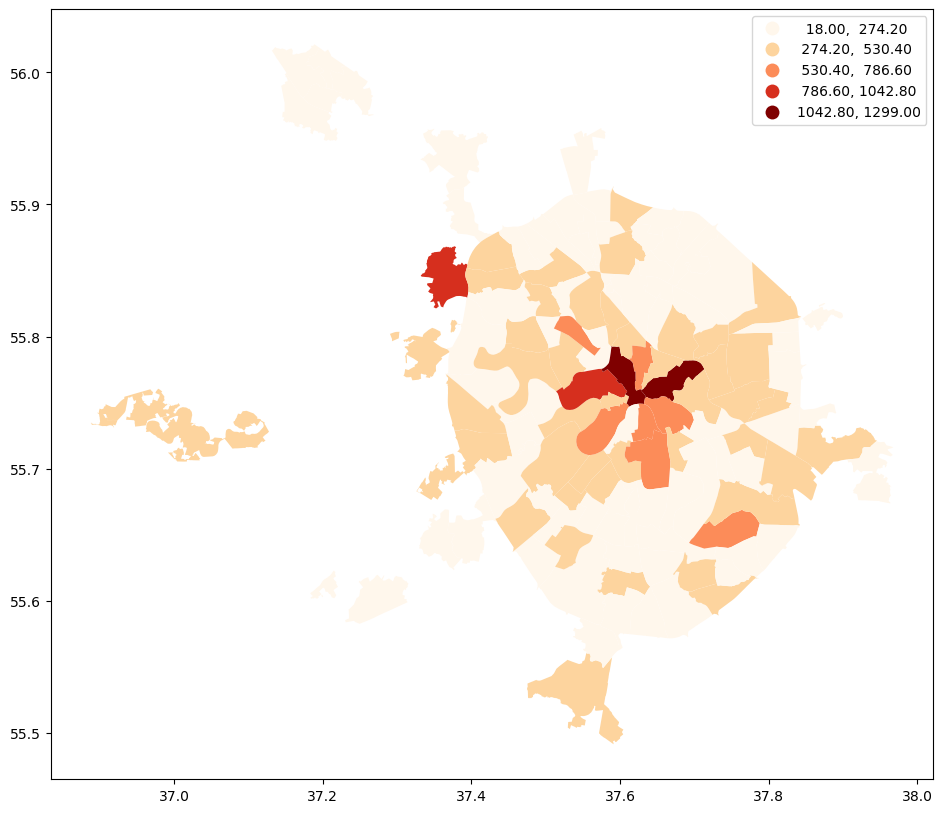

In [52]:
# district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals', legend=True);
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='EqualInterval', legend=True);

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [53]:
district_stats = district_stats.to_crs(epsg=3857)

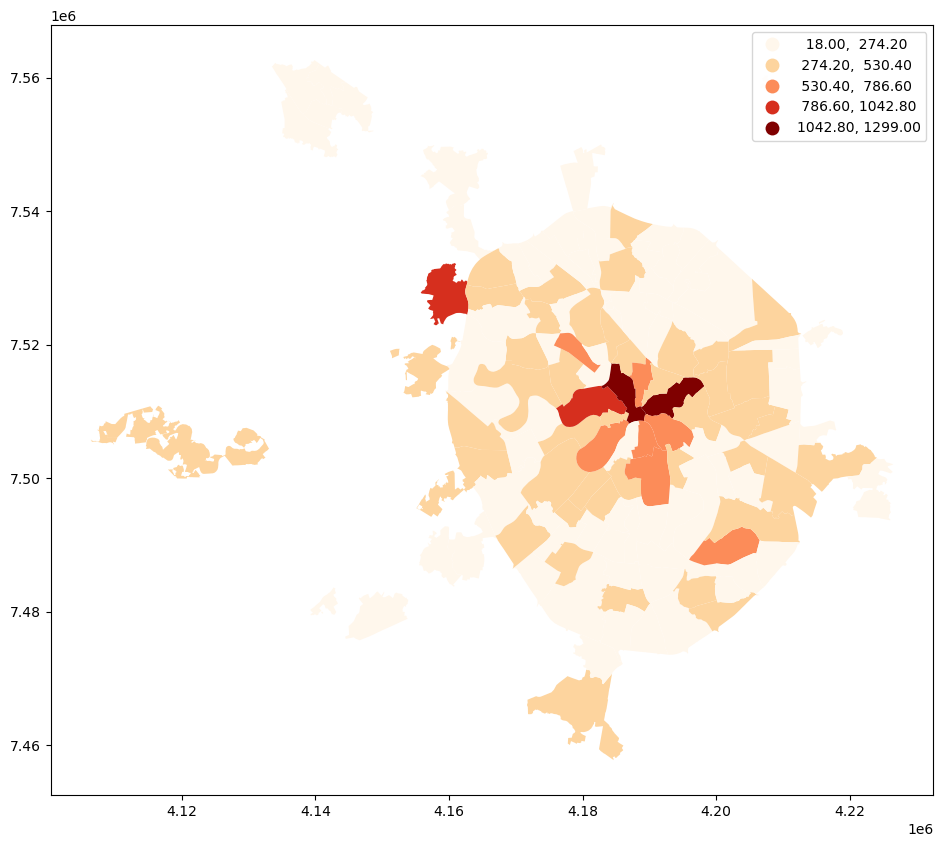

In [55]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='EqualInterval', legend=True);

Проекция карты типо рисуется по другому.

---

**Вывод:**

Теперь мы научились делать Speacil Join'ы и можно попробовать создавать различные признаки для нашей задачи, можно воспользоваться запросом и скачать информацию по местам: кафе, магазины и т.д. И затем проведя Special Join, добавить эти места (доп. инфа) к нашим ячейкам из предыдущей задачи (см. урок 1)

---